In [57]:
import pandas as pd
import numpy as np

from scipy.stats import pearsonr, spearmanr, ttest_1samp, ttest_ind_from_stats, zscore, normaltest, kstest
from scipy.special import logit
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
rcParams['svg.fonttype'] = 'none'
rcParams['font.size']=15

from seaborn import jointplot, scatterplot 

from keras.models import Sequential, load_model

In [58]:
dnase_regression = load_model('/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/ml_lcl/model_8_gc_matched_neg.hdf5', compile=False)
mpra_regression = load_model('/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/ml_lcl/tewhey_mpra_training/model_8.hdf5', compile=False)

In [4]:
peak_sequences_train = np.load("/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/ml_lcl/chrs_training_summit_centered_training_set_hg19_X.npy")
peak_sequences_valid = np.load("/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/ml_lcl/chr4_summit_centered_validation_set_hg19_X.npy")
peak_sequences_test = np.load("/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/ml_lcl/chr8_9_summit_centered_test_set_hg19_X.npy")
tewhey_ref_sequences = np.load("/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/ml_lcl/tewhey_one_hot_encoded_ref_sequences.npy")
tewhey_alt_sequences = np.load("/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/ml_lcl/tewhey_one_hot_encoded_alt_sequences.npy")

In [5]:
all_sequences = np.concatenate((peak_sequences_train,
                                peak_sequences_valid,
                                peak_sequences_test,
                                tewhey_ref_sequences,
                                tewhey_alt_sequences), axis=0)

In [6]:
all_sequences.shape

(189322, 1000, 4)

In [7]:
dnase_regression_pred = dnase_regression.predict(all_sequences)
mpra_regression_pred = mpra_regression.predict(all_sequences)

In [12]:
np.save("dnase_regression_pred_all_sequences.npy", dnase_regression_pred)
np.save("mpra_regression_pred_all_sequences.npy", mpra_regression_pred)

In [59]:
dnase_regression_pred = np.load("dnase_regression_pred_all_sequences.npy")
mpra_regression_pred = np.load("mpra_regression_pred_all_sequences.npy")

In [60]:
mpra_regression_pred = mpra_regression_pred[~np.isnan(np.log2(dnase_regression_pred))]
dnase_regression_pred = dnase_regression_pred[~np.isnan(np.log2(dnase_regression_pred))]

In [61]:
pred_difference = zscore(np.log2(dnase_regression_pred)) - zscore(mpra_regression_pred)

(array([2.0000e+00, 3.0000e+00, 0.0000e+00, 6.0000e+00, 3.0000e+00,
        8.0000e+00, 6.0000e+00, 1.5000e+01, 9.0000e+00, 2.8000e+01,
        2.4000e+01, 4.5000e+01, 6.3000e+01, 8.1000e+01, 1.0900e+02,
        1.5200e+02, 2.1000e+02, 3.1800e+02, 4.7900e+02, 5.8600e+02,
        8.3200e+02, 1.1740e+03, 1.5200e+03, 2.0350e+03, 2.6810e+03,
        3.2410e+03, 3.7270e+03, 4.0570e+03, 4.3470e+03, 4.4740e+03,
        4.4440e+03, 4.8270e+03, 5.6180e+03, 7.7540e+03, 1.5943e+04,
        2.3984e+04, 1.9030e+04, 3.3814e+04, 2.4116e+04, 3.4660e+03]),
 array([-14.838868  , -14.368075  , -13.897283  , -13.42649   ,
        -12.955697  , -12.484904  , -12.0141115 , -11.543319  ,
        -11.072526  , -10.601733  , -10.13094   ,  -9.660148  ,
         -9.189355  ,  -8.718562  ,  -8.247769  ,  -7.7769766 ,
         -7.306184  ,  -6.835391  ,  -6.3645983 ,  -5.8938055 ,
         -5.4230127 ,  -4.95222   ,  -4.481427  ,  -4.0106344 ,
         -3.539842  ,  -3.0690491 ,  -2.5982563 ,  -2.1274636 ,
      

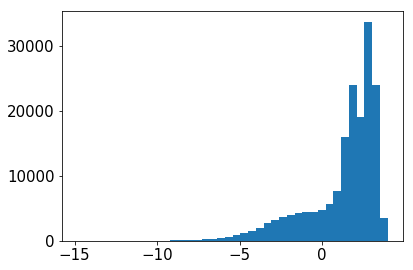

In [62]:
plt.hist(np.log2(dnase_regression_pred), bins=40)

(array([2.0000e+00, 3.0000e+00, 0.0000e+00, 6.0000e+00, 3.0000e+00,
        8.0000e+00, 6.0000e+00, 1.5000e+01, 9.0000e+00, 2.8000e+01,
        2.4000e+01, 4.5000e+01, 6.3000e+01, 8.1000e+01, 1.0900e+02,
        1.5200e+02, 2.1000e+02, 3.1800e+02, 4.7900e+02, 5.8600e+02,
        8.3200e+02, 1.1740e+03, 1.5200e+03, 2.0350e+03, 2.6810e+03,
        3.2410e+03, 3.7270e+03, 4.0570e+03, 4.3470e+03, 4.4740e+03,
        4.4440e+03, 4.8270e+03, 5.6180e+03, 7.7540e+03, 1.5943e+04,
        2.3985e+04, 1.9029e+04, 3.3814e+04, 2.4116e+04, 3.4660e+03]),
 array([-7.3768415 , -7.161522  , -6.9462023 , -6.7308826 , -6.515563  ,
        -6.3002434 , -6.0849237 , -5.869604  , -5.6542845 , -5.438965  ,
        -5.223645  , -5.0083256 , -4.793006  , -4.5776863 , -4.3623667 ,
        -4.147047  , -3.9317276 , -3.716408  , -3.5010884 , -3.2857687 ,
        -3.070449  , -2.8551295 , -2.6398098 , -2.4244902 , -2.2091706 ,
        -1.993851  , -1.7785313 , -1.5632117 , -1.347892  , -1.1325724 ,
        -0.91725

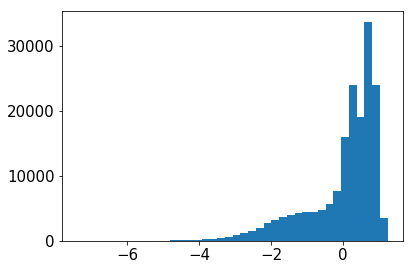

In [63]:
plt.hist(zscore(np.log2(dnase_regression_pred)), bins=40)

(array([3.2000e+01, 3.3500e+02, 2.9130e+03, 1.2151e+04, 2.6222e+04,
        3.2403e+04, 2.7355e+04, 1.8738e+04, 1.2863e+04, 9.7570e+03,
        7.9940e+03, 6.5920e+03, 5.3490e+03, 3.9190e+03, 2.6950e+03,
        1.7720e+03, 9.9000e+02, 5.7800e+02, 2.6000e+02, 1.3500e+02,
        5.9000e+01, 5.2000e+01, 2.0000e+01, 6.0000e+00, 9.0000e+00,
        2.0000e+00, 1.0000e+00, 7.0000e+00, 6.0000e+00, 5.0000e+00,
        5.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([-2.3545017 , -2.0284212 , -1.7023405 , -1.3762598 , -1.0501792 ,
        -0.72409856, -0.39801794, -0.0719373 ,  0.25414333,  0.580224  ,
         0.9063046 ,  1.2323853 ,  1.5584658 ,  1.8845465 ,  2.210627  ,
         2.5367079 ,  2.8627884 ,  3.188869  ,  3.5149496 ,  3.8410304 ,
         4.167111  ,  4.4931917 ,  4.819272  ,  5.145353  ,  5.4714336 ,
         5.797514  ,  6.1235948 ,  6.4496756 ,  6.775756  ,  7.1018367 ,
         7.42791

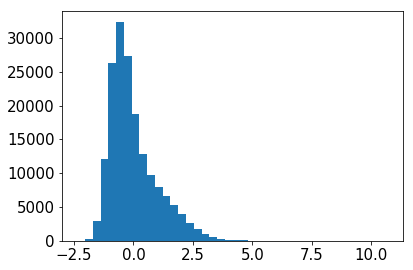

In [64]:
plt.hist(zscore(mpra_regression_pred), bins=40)

(array([2.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00,
        5.0000e+00, 8.0000e+00, 5.0000e+00, 3.0000e+00, 7.0000e+00,
        1.1000e+01, 8.0000e+00, 2.2000e+01, 2.7000e+01, 3.4000e+01,
        5.2000e+01, 8.2000e+01, 1.4700e+02, 2.0400e+02, 3.0700e+02,
        5.1800e+02, 8.4100e+02, 1.5580e+03, 2.5360e+03, 4.0740e+03,
        6.0860e+03, 8.4680e+03, 1.1240e+04, 1.3343e+04, 1.4845e+04,
        1.6292e+04, 1.7233e+04, 1.8731e+04, 1.9288e+04, 1.7295e+04,
        1.2157e+04, 5.9190e+03, 1.6100e+03, 2.4700e+02, 2.4000e+01]),
 array([-10.003607  ,  -9.680056  ,  -9.3565035 ,  -9.032952  ,
         -8.709401  ,  -8.385849  ,  -8.062298  ,  -7.7387466 ,
         -7.415195  ,  -7.0916433 ,  -6.768092  ,  -6.4445405 ,
         -6.1209893 ,  -5.7974377 ,  -5.473886  ,  -5.150335  ,
         -4.826783  ,  -4.503232  ,  -4.1796803 ,  -3.856129  ,
         -3.5325775 ,  -3.2090259 ,  -2.8854744 ,  -2.561923  ,
         -2.2383716 ,  -1.9148201 ,  -1.5912685 ,  -1.2677171 ,
      

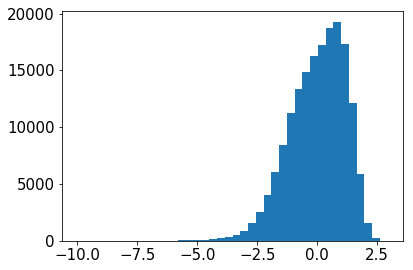

In [65]:
plt.hist(pred_difference, bins=40)

In [39]:
normaltest(pred_difference)

NormaltestResult(statistic=13079.015760265458, pvalue=0.0)

In [42]:
kstest(pred_difference, 'norm')

KstestResult(statistic=0.07755111975715145, pvalue=0.0)

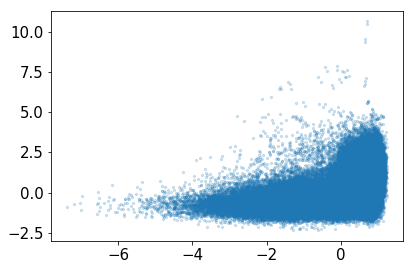

In [68]:
plt.scatter(zscore(np.log2(dnase_regression_pred)),
            zscore(mpra_regression_pred),
            s=5,
            alpha=0.2
           )

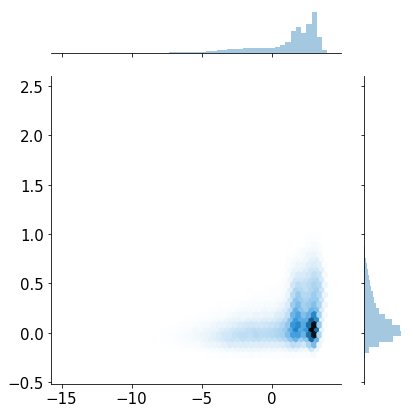

In [66]:
jointplot(x=np.log2(dnase_regression_pred),
          y=mpra_regression_pred,
          kind='hex'
         )

In [47]:
joint(dnase_regression_pred, mpra_regression_pred)

(0.3211516, 0.0)

In [48]:
spearmanr(dnase_regression_pred, mpra_regression_pred)

SpearmanrResult(correlation=0.332228768217601, pvalue=0.0)